## Objective
IMPLEMENT K-NN from Scratch !

The test problem we will be using in this tutorial is the iris classification.

The problem is comprised of 150 observations of iris flowers from three different species. There are 4 measurements of given flowers: sepal length, sepal width, petal length, and petal width, all in the same unit of centimeters. The predicted attribute is the species, which is one of Setosa, Versicolor, or Virginica.

It is a standard dataset where the species is known for all instances. As such we can split the data into training and test datasets and use the results to evaluate our algorithm implementation. Good classification accuracy on this problem is above 90% correct, typically 96% or better.

Save the file in your current working directory with the file name “iris.data“.

This tutorial is broken down into the following steps:

Handle Data: Open the dataset from CSV and split it into test/train datasets.

Similarity: Calculate the distance between two data instances.

Neighbors: Locate k most similar data instances.

Response: Generate a response from a set of data instances.

Accuracy: Summarize the accuracy of predictions.

Main: Tie it all together.

## 1. Handle Data

In [5]:
#The first thing we need to do is load our data file. 
import csv

with open('downloads/iris.data.txt', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines :
        print (', '.join(row))

5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

In [21]:
#Next we need to split the data into a training dataset 
import random
import csv
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        random.seed(0)
        random.shuffle(dataset)
        for x in range(len(dataset)):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
        indx= int(len(dataset)*split)
        trainingSet= dataset[:indx]
        testSet=dataset[indx:]

        return trainingSet , testSet

In [23]:
#We can test this function out with our iris dataset, as follows:

trainingSet=[]
testSet = []

loadDataset('downloads/iris.data.txt', 0.66,trainingSet , testSet)

print(len(trainingSet),len(testSet))

0 0


## 2. Similarity

To make predictions we need to calculate the similarity between any two given data instances. This is needed so that we can locate the k most similar data instances in the training dataset for a given member of the test dataset and in turn, make a prediction.

Given that all four flower measurements are numeric and have the same units, we can directly use the Euclidean distance measure. 

Additionally, we want to control which fields to include in the distance calculation. Specifically, we only want to include the first 4 attributes. One approach is to limit the Euclidean distance to a fixed length, ignoring the final dimension.

In [24]:
#define the euclidean distance
import math
def euclideanDistance(instance1, instance2, length):
    difference_squared = 0
    for x in range(length):
        difference_squared += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(difference_squared)

## 3. Neighbors

Now that we have a similarity measure, we can use it to collect the k most similar instances for a given unseen instance.

This is a straightforward process of calculating the distance for all instances and selecting a subset with the smallest distance values.

Below is the getNeighbors function that returns k most similar neighbors from the training set for a given test instance (using the already defined euclideanDistance function)

In [32]:
import operator

def getNeighbors(trainingSet, testInstance, k,distance_metric=None):
   
    distances = []
    length = len(testInstance)-1
    #print(length)
    for x in range(len(trainingSet)):
        dist = distance_metric(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
      
    distances.sort(key=operator.itemgetter(1))
        #print('distances sorted',distances)
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
        #print('The new one look like neighbors', neighbors)
    return neighbors


## 4. Response

Once we have located the most similar neighbors for a test instance, the next task is to devise a predicted response based on those neighbors.

We can do this by allowing each neighbor to vote for their class attribute, and take the majority vote as the prediction.

Below provides a function for getting the majority voted response from a number of neighbors. It assumes the class is the last attribute for each neighbor.

In [36]:
def getResponse(neighbors):
    classVotes = {}

    for x in range(len(neighbors)):
        response = neighbors[x][-1] #complete with appropriate number
        
        classVotes.setdefault(response,0)
        if response in classVotes.keys():
            # increase frequency by +1
            classVotes[response] +=1

    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [38]:
#We can test out this function with some test neighbors, as follows:

neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = getResponse(neighbors)
print(response)

a


This approach returns one response in the case of a draw, but you could handle such cases in a specific way, such as returning no response or selecting an unbiased random response.

## 5. Accuracy

We have all of the pieces of the kNN algorithm in place. An important remaining concern is how to evaluate the accuracy of predictions.

An easy way to evaluate the accuracy of the model is to calculate a ratio of the total correct predictions out of all predictions made, called the classification accuracy.

Below is the getAccuracy function that sums the total correct predictions and returns the accuracy as a percentage of correct classifications.

In [39]:
def getAccuracy(testSet, predictions):
    # Complete the function
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct +=1
   
    return (correct/len(testSet)) * 100.0

# We can test this function with a test dataset and predictions, as follows:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


## 6. Main

In [41]:
def main(dataset_filename, k, split, distanceFunc):
    
    trainingSet, testSet=loadDataset(dataset_filename, split)
    
    predictions = []
    for testInstance in testSet:
        neighbors = getNeighbors(trainingSet, testInstance[:-1], k, distanceFunc)
        response = getResponse(neighbors)
        predictions.append(response)
        
    accuracy = getAccuracy(testSet, predictions)
    print("Accuracy = %.2f" % accuracy)
    return accuracy

## 7. Another distance metric

define another distance metric instead of euclidean distance

In [46]:
def manhattanDistance(instance1, instance2, length):
    #   Complete the function
    distance = 0
    for i in range(length):
        distance += abs(instance2[i]-instance1[i])

    return distance

def minkowskiDistance(instance1, instance2, length,degree=2):
    difference_squared = 0
    for x in range(length):
        difference_squared += pow((instance1[x] - instance2[x]), degree)
    return pow(difference_squared,1/degree)

In [48]:
scores=[]
for k in range(1,31):
    accuracy=main("downloads/iris.data.txt", k, 0.66, manhattanDistance)
    scores.append(accuracy)

Accuracy = 92.16
Accuracy = 92.16
Accuracy = 92.16
Accuracy = 92.16
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 92.16
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 96.08


### The best accuracy :

In [49]:
import numpy as np
print("the best Accuracy is",np.max(scores))
print("best k is :", np.argmax(scores)+1)

the best Accuracy is 96.07843137254902
best k is : 30


### Plot to confirm it :

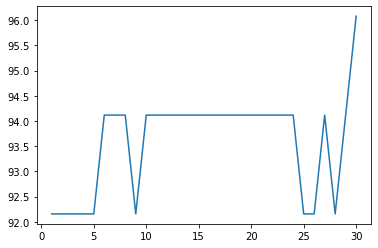

In [58]:
import matplotlib.pyplot as plt

plt.plot(range(1,31),scores)